<a href="https://colab.research.google.com/github/NithinNarayanan07/DataScience2/blob/main/DataScience_Review1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import missingno as msno


The dataset is provided “National Institute of Diabetes and Digestive and Kidney Diseases”

# **PRE PROCESSING**

In [ ]:
#Reading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/NithinNarayanan07/DataScience2/main/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8,183.0,NaN,0.0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0,137.0,40.0,NaN,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63.0,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27.0,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30.0,0
766,1,126.0,60.0,0.0,0,30.1,0.349,47.0,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,755.000000,749.000000,756.000000,758.000000,748.000000,749.000000,768.000000
mean,3.845052,120.901987,69.224299,20.432540,32.055409,0.471807,33.303071,0.348958
std,3.369578,32.106767,19.151322,15.956047,7.828241,0.332024,11.826859,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.050000,0.370500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                  0
Glucose                     13
BloodPressure               19
SkinThickness               12
Insulin                      6
BMI                         10
DiabetesPedigreeFunction    20
Age                         19
Outcome                      0
dtype: int64

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                      object
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [ ]:
df["Insulin"].fillna(str(0.0),inplace=True)
df.Insulin = df.Insulin.astype('float64')
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8,183.0,NaN,0.0,0.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,NaN,168.0,43.1,2.288,33.0,1


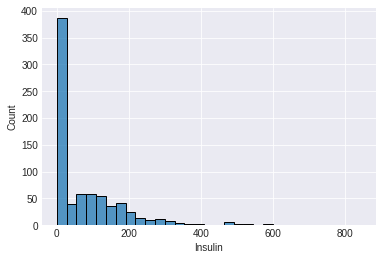

In [ ]:
sns.histplot(data=df["Insulin"])

In [ ]:
df["Insulin"].isnull().sum()

1

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8,183.0,NaN,0.0,0.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,NaN,168.0,43.1,2.288,33.0,1
5,5,116.0,74.0,0.0,0.0,NaN,0.201,30.0,0
6,3,78.0,NaN,32.0,0.0,31.0,0.248,26.0,1
7,10,115.0,NaN,0.0,0.0,NaN,0.134,29.0,0
8,2,197.0,70.0,45.0,543.0,NaN,0.158,53.0,1
9,8,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


In [ ]:
df["Insulin"]=df["Insulin"].fillna(0)
df["Insulin"].isnull().sum()

0

In [ ]:
x=df["Insulin"]
y=len(df.loc[(df["Insulin"]==0) & (df["Outcome"]==1),"Outcome"])
print(y)
z=df.loc[(df["Outcome"]==1) & (df["Insulin"]!=0),"Insulin"].mean()
print(z)
I=df["Insulin"];O=df["Outcome"]
for i in range(len(I)):
  if I[i]==0 and O[i]==1:
    df.at[i,"Insulin"]=z


140
207.59375


In [ ]:
x=df["Insulin"]
y=len(df.loc[(df["Insulin"]==0) & (df["Outcome"]==0),"Outcome"])
print(y)
z=df.loc[(df["Outcome"]==0) & (df["Insulin"]!=0),"Insulin"].mean()
print(z)
I=df["Insulin"];O=df["Outcome"]
for i in range(len(I)):
  if I[i]==0 and O[i]==0:
    df.at[i,"Insulin"]=z



238
129.72519083969465


In [ ]:
d={}
for i in df.columns:
  d[i]=df[i].mean()
print(d)
df=df.fillna(value=d)


{'Pregnancies': 3.8450520833333335, 'Glucose': 120.90198675496688, 'BloodPressure': 69.22429906542057, 'SkinThickness': 20.432539682539684, 'Insulin': 156.89807346334376, 'BMI': 32.05540897097624, 'DiabetesPedigreeFunction': 0.47180748663101557, 'Age': 33.30307076101469, 'Outcome': 0.3489583333333333}


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,207.593750,33.600000,0.627,50.0,1
1,1,85.0,66.000000,29.00000,129.725191,26.600000,0.351,31.0,0
2,8,183.0,69.224299,0.00000,207.593750,23.300000,0.672,32.0,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21.0,0
4,0,137.0,40.000000,20.43254,168.000000,43.100000,2.288,33.0,1
5,5,116.0,74.000000,0.00000,129.725191,32.055409,0.201,30.0,0
6,3,78.0,69.224299,32.00000,207.593750,31.000000,0.248,26.0,1
7,10,115.0,69.224299,0.00000,129.725191,32.055409,0.134,29.0,0


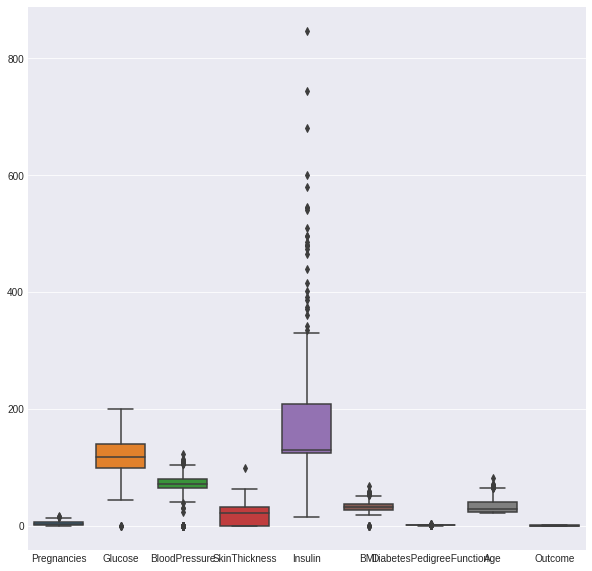

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,207.593750,33.6,0.627,50.0,1
1,1,85.0,66.000000,29.00000,129.725191,26.6,0.351,31.0,0
2,8,183.0,69.224299,0.00000,207.593750,23.3,0.672,32.0,1
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.000000,20.43254,168.000000,43.1,2.288,33.0,1


129.72519083969465

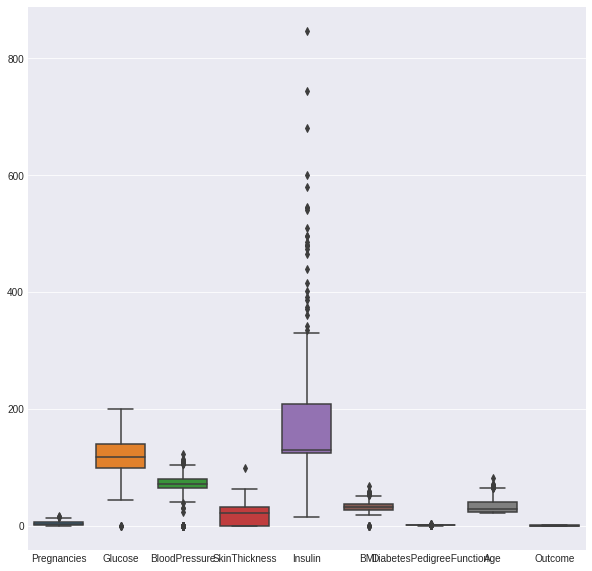

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
df["Insulin"].median()

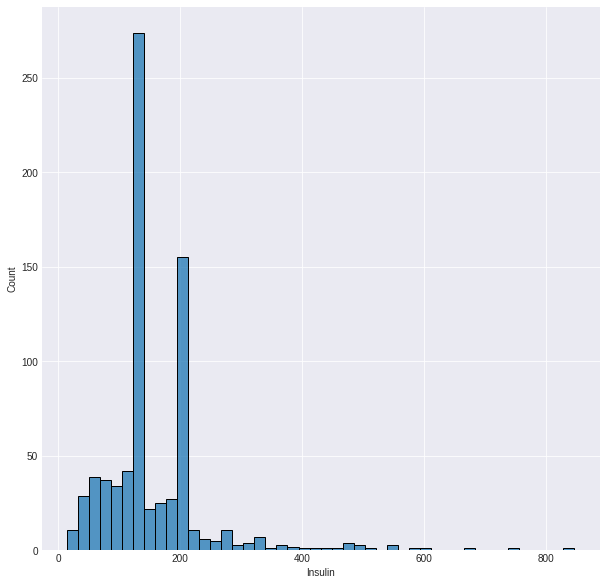

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=df["Insulin"])

In [ ]:
df.shape

(768, 9)

In [ ]:
#Q4
def out(dat):
  
  q1=np.percentile(dat,25)
  q3=np.percentile(dat,75)
  iqr=q3-q1
  lp=q1-iqr*1.5
  up=q3+iqr*1.5
  return lp,up
lp,up=out(df['Insulin'])
print(lp,up)
upper = np.where(df['Insulin'] >= up)
lower=np.where(df['Insulin'] <= lp)
#print(upper,lower)
print(df.shape) 
df=df.drop(upper[0])
df=df.drop(lower[0])
print(df.shape)


-0.765625 332.609375
(768, 9)
(741, 9)


In [ ]:
print(df.shape)

(741, 9)


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/NithinNarayanan07/DataScience2/main/diabetes2.csv')
df.drop("Unnamed: 0",axis='columns', inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,207.593750,33.6,0.627,50.0,1
1,1,85.0,66.000000,29.00000,129.725191,26.6,0.351,31.0,0
2,8,183.0,69.224299,0.00000,207.593750,23.3,0.672,32.0,1
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.000000,20.43254,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
736,10,101.0,76.000000,48.00000,180.000000,32.9,0.171,63.0,0
737,2,122.0,70.000000,27.00000,129.725191,36.8,0.340,27.0,0
738,5,121.0,72.000000,23.00000,112.000000,26.2,0.245,30.0,0
739,1,126.0,60.000000,0.00000,207.593750,30.1,0.349,47.0,1


For removing the Index coloumn

# ***Visualization***

After removing NaN values

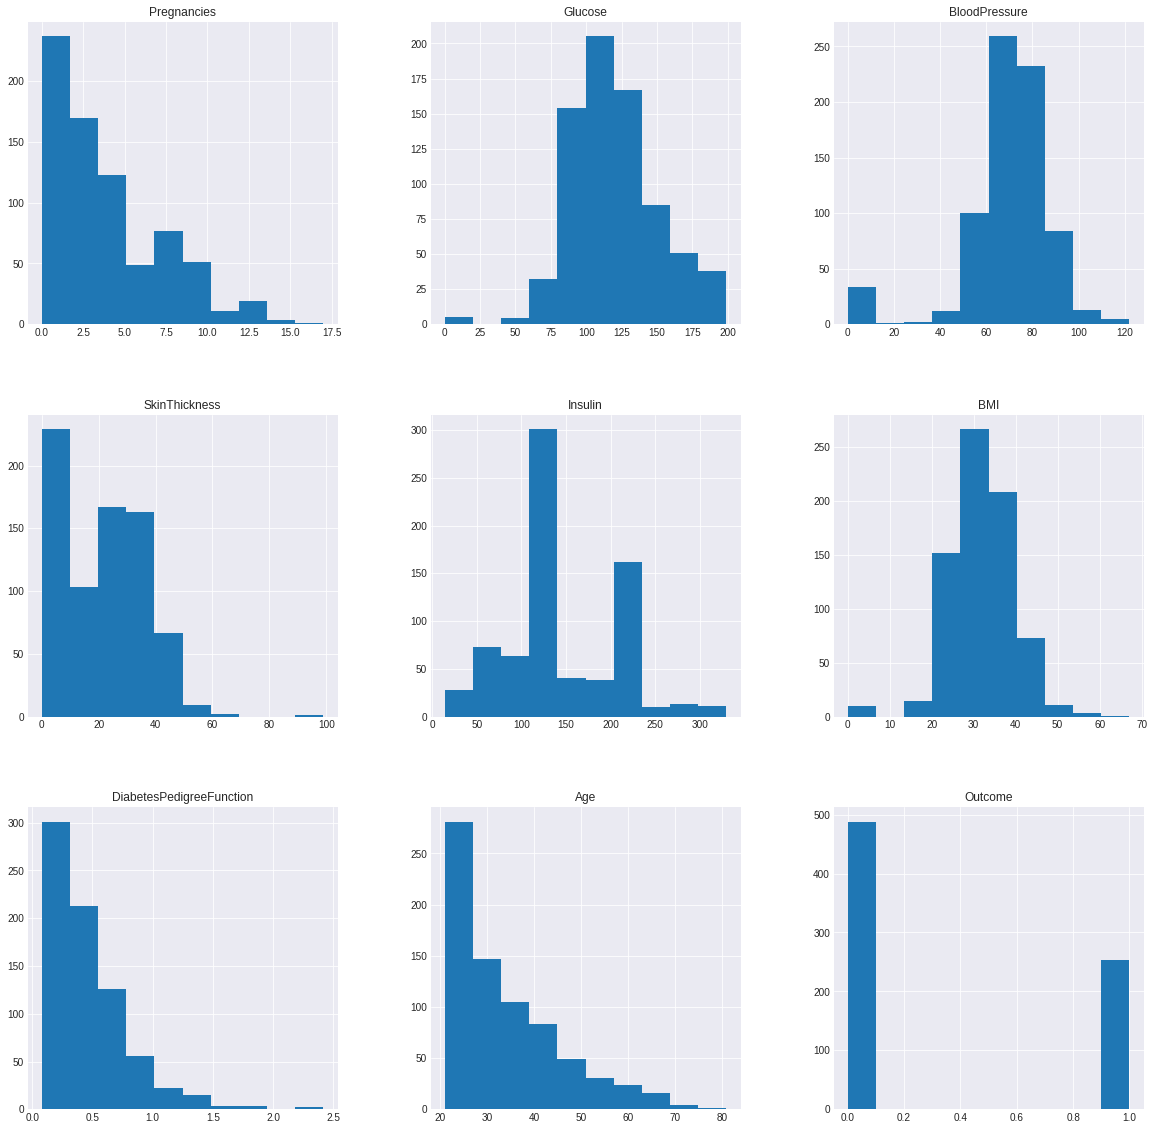

In [ ]:
p = df.hist(figsize = (20,20))

This says the correlation of each and pair using a heatmap,

Bright colours : More correlation
here the pregnencies,Insulin levels,DiabetesPedigreeFunction and age are having same correlation with respect to outcome


                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.150805  ...  0.537748  0.226991
Glucose                      0.150805  1.000000  ...  0.266373  0.463951
BloodPressure                0.156067  0.172834  ...  0.238254  0.069520
SkinThickness               -0.075880  0.016535  ... -0.113684  0.054259
Insulin                      0.181927  0.459352  ...  0.229488  0.553516
BMI                          0.020045  0.211949  ...  0.041181  0.298069
DiabetesPedigreeFunction    -0.037332  0.119757  ...  0.049868  0.187464
Age                          0.537748  0.266373  ...  1.000000  0.225448
Outcome                      0.226991  0.463951  ...  0.225448  1.000000

[9 rows x 9 columns]


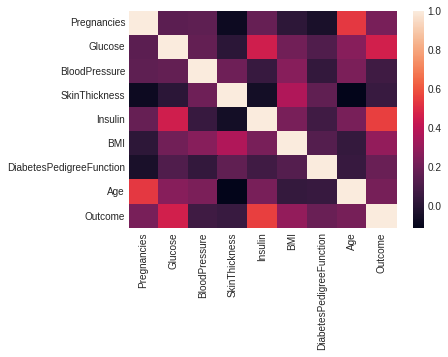

In [ ]:
df1 =df.corr()
print(df1)
sns.heatmap(df1)

We can see how many are diabetic and how many are not using barplot


0 : Non-diabetic


1 : Diabetic

0    488
1    253
Name: Outcome, dtype: int64


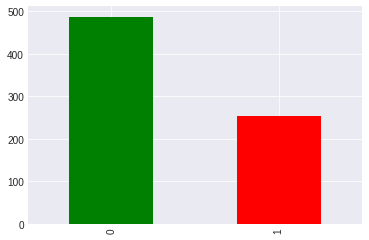

In [ ]:
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar",color=['green','red'])

To know whether there are any null counts remaining

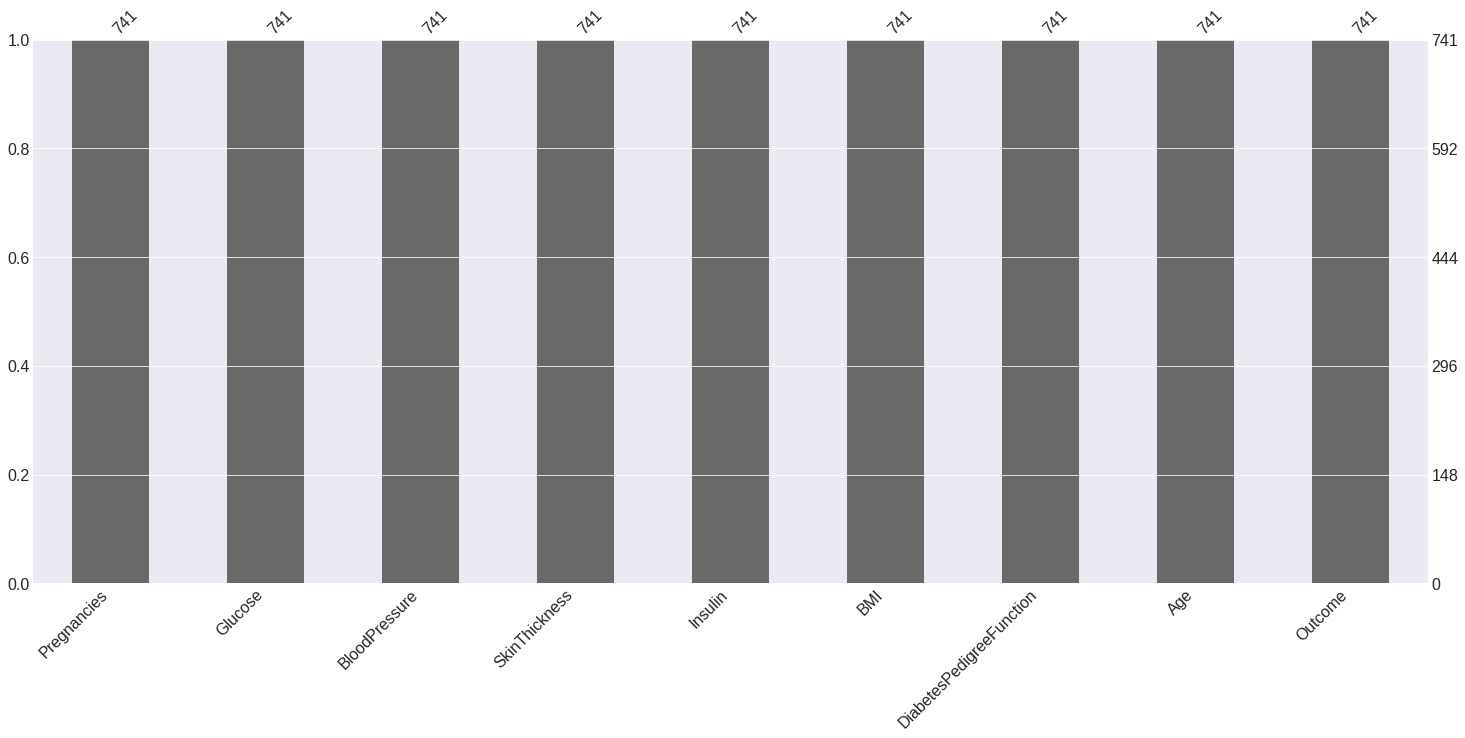

In [ ]:
n=msno.bar(df)



1. In this case the data is right skewd. For data of count of pregenancies. A large proportion of the participants are zero count on pregnancy. Based on the assumption as the data set includes women > 25 yrs, its likely that many are married
2. The hypothesis of segmented graphs shows many of the pregnencies includes women are diabetic which is a worry and this shows that there is a possibility that the future generations of the following might be diabetic 
3. There are ouliners in one subset ,mainly most of the non_diabetic are having more pregnencies which is not a worry.







/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot for Preg by Outcome')

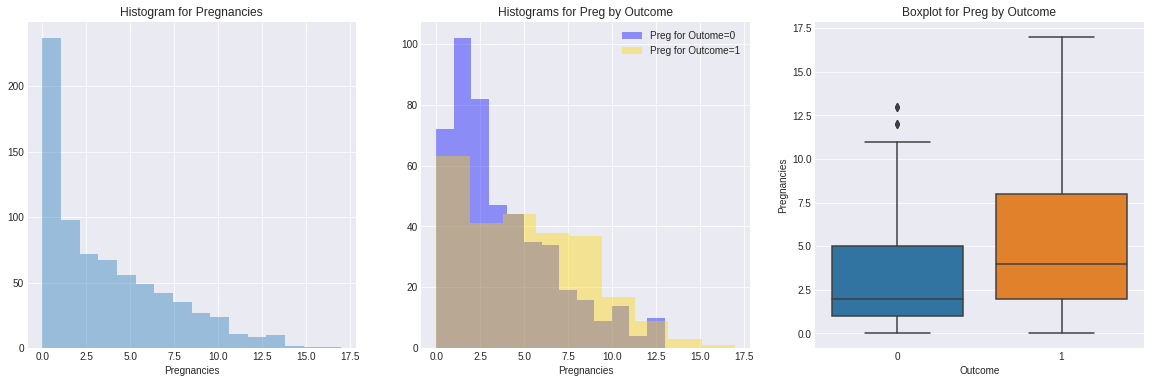

In [ ]:
df5 = df[df.Outcome==0]
df6 = df[df.Outcome==1]
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title("Histogram for Pregnancies")
sns.distplot(df.Pregnancies,kde=False)
plt.subplot(1,3,2)
sns.distplot(df5.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(df6.Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.Pregnancies)
plt.title("Boxplot for Preg by Outcome")

# **EDA**

**Dimension of Dataframe**

In [ ]:
df.shape

(741, 9)

**Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               741 non-null    int64  
 1   Glucose                   741 non-null    float64
 2   BloodPressure             741 non-null    float64
 3   SkinThickness             741 non-null    float64
 4   Insulin                   741 non-null    float64
 5   BMI                       741 non-null    float64
 6   DiabetesPedigreeFunction  741 non-null    float64
 7   Age                       741 non-null    float64
 8   Outcome                   741 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 52.2 KB


**Description**

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.00000
mean,3.858300,119.457120,69.216416,19.977315,144.724319,31.927529,0.467666,33.304667,0.34143
std,3.385606,31.188013,19.145780,15.816168,58.617296,7.796877,0.317513,11.663814,0.47451
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.00000
25%,1.000000,99.000000,64.000000,0.000000,120.000000,27.300000,0.245000,24.000000,0.00000
50%,3.000000,116.000000,72.000000,22.000000,129.725191,32.000000,0.380000,29.000000,0.00000
75%,6.000000,137.000000,80.000000,32.000000,207.593750,36.400000,0.605000,40.000000,1.00000
max,17.000000,199.000000,122.000000,99.000000,330.000000,67.100000,2.420000,81.000000,1.00000


In [ ]:
df['Age'].mean()

33.304667131524

In [ ]:
df['BMI'].mode()

0    32.0
dtype: float64

In [ ]:
df['Age'].kurt()

0.7546323361216842

**Scatter Plot**

Text(0.5, 1.0, 'Scatter Plot')

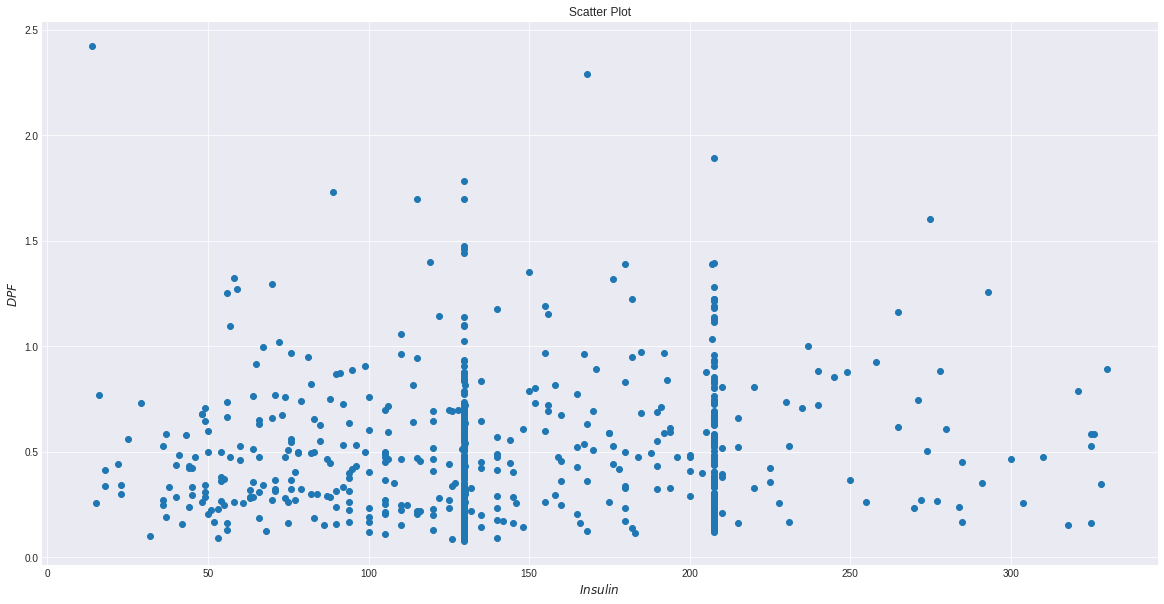

In [ ]:
plt.style.use('seaborn-darkgrid')
x=list(df['Insulin'])
y=list(df['DiabetesPedigreeFunction'])
plt.figure(figsize=(20,10))
plt.scatter(x,y)

plt.xlabel('$Insulin$' , fontsize = 12)
plt.ylabel('$DPF$' , fontsize = 12)
plt.title ('Scatter Plot')

**Pie Chart**

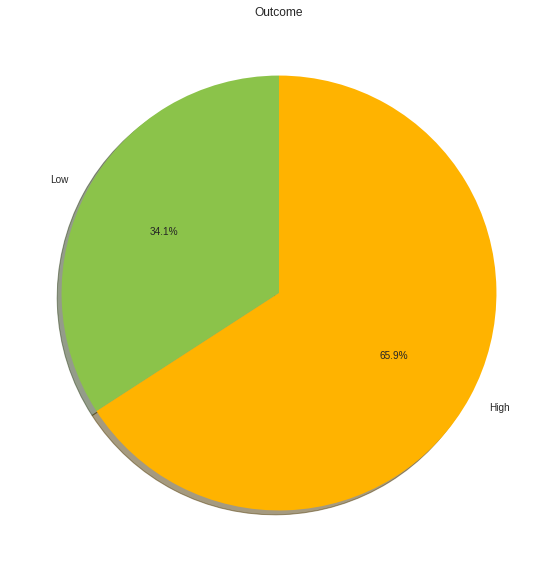

In [ ]:

plt.figure(figsize=(10,10))
x,y=df[df['Outcome']==1].shape
y,z=df[df['Outcome']==0].shape
outcome =[x,y]
labels = ['Low','High']
colors = ['#8BC34A','#FFB300']
plt.title('Outcome')
plt.pie(outcome , labels= labels , colors= colors , startangle=90, shadow='true', autopct='%1.1f%%')
plt.show()